# CNN attempts by group 3

In [77]:
# import pandas as pd
# import torch
# import torchvision
# from torch import nn, optim
# from torch.utils.data import DataLoader, random_split
# from torchvision import transforms
# from torchvision.datasets import ImageFolder
# from torchvision.utils import make_grid
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

## Loading CIFAR 10 data set + preprocessing data

In [78]:
import numpy as np

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [79]:
#encoding labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [80]:
 #Normalize data

x_train = x_train / 255
x_test = x_test / 255

### Data Augmentaion

In [81]:
# Data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(x_train)  # Assuming x_train contains your training images

### Visualization

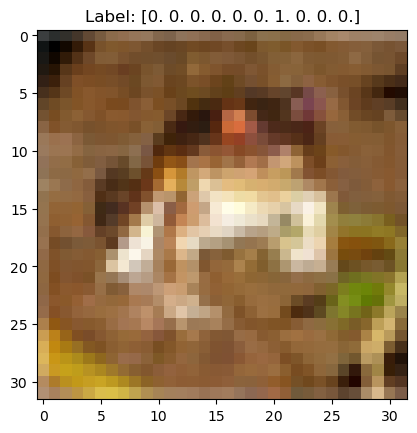

In [82]:
# Display the first image
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.title(f"Label: {y_train[0]}")
plt.show()

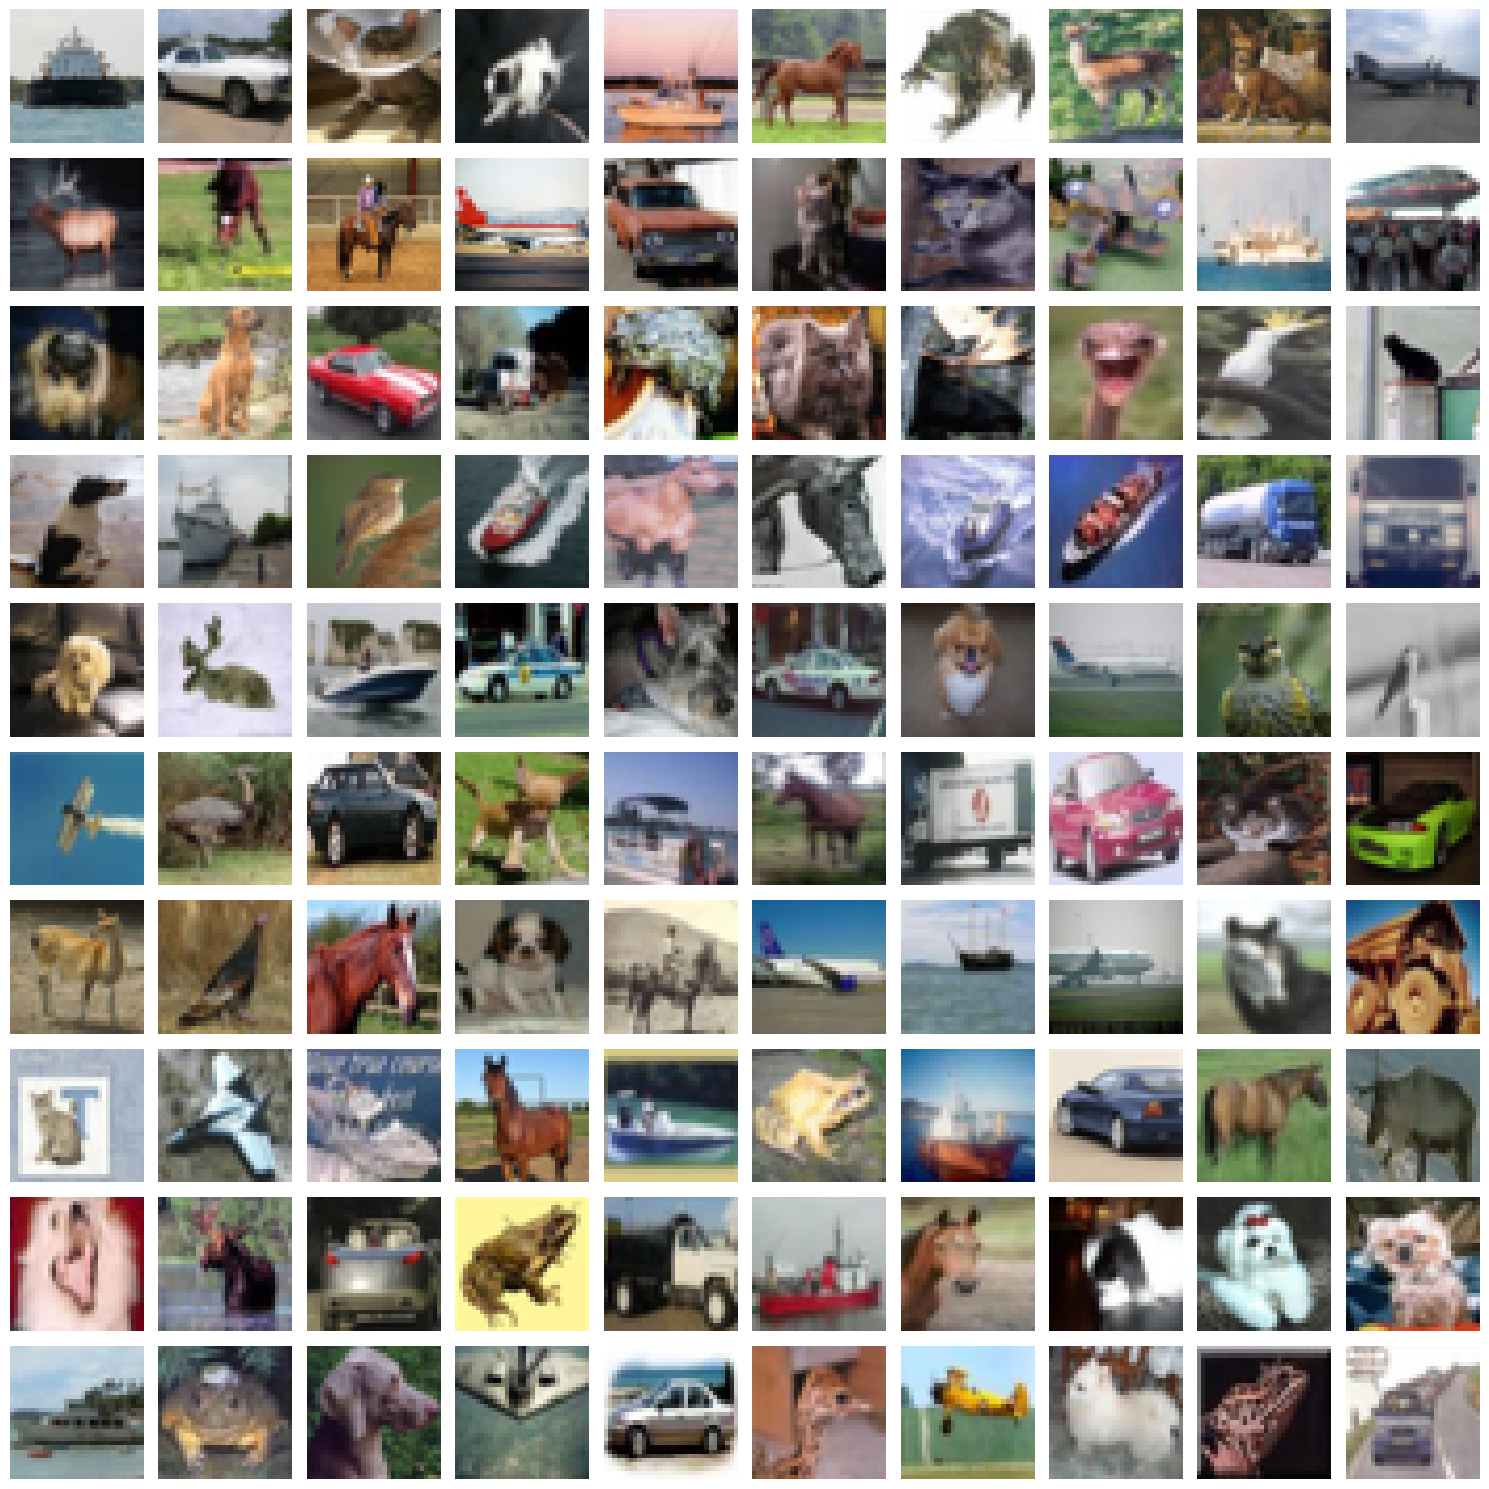

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 10x10 grid
plt.figure(figsize=(15, 15))  # Set the figure size for better visibility

# Randomly select 100 indices
random_indices = np.random.choice(len(x_train), 100, replace=False)

for i, idx in enumerate(random_indices):
    plt.subplot(10, 10, i + 1)  # Create a 10x10 grid
    plt.imshow(x_train[idx], cmap=plt.get_cmap('gray'))  # Display a random image
    plt.axis('off')  # Turn off axes for cleaner visualization

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

In [84]:
# Scaling up the images to 64 x 64:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.image import resize
import tensorflow as tf

# Resize x_train and x_test
x_train_resized = tf.image.resize(x_train, (64, 64), method=tf.image.ResizeMethod.BICUBIC)
x_test_resized = tf.image.resize(x_test, (64, 64), method=tf.image.ResizeMethod.BICUBIC)
y_train_resized = tf.image.resize(x_train, (64, 64), method=tf.image.ResizeMethod.BICUBIC)
y_test_resized = tf.image.resize(x_test, (64, 64), method=tf.image.ResizeMethod.BICUBIC)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


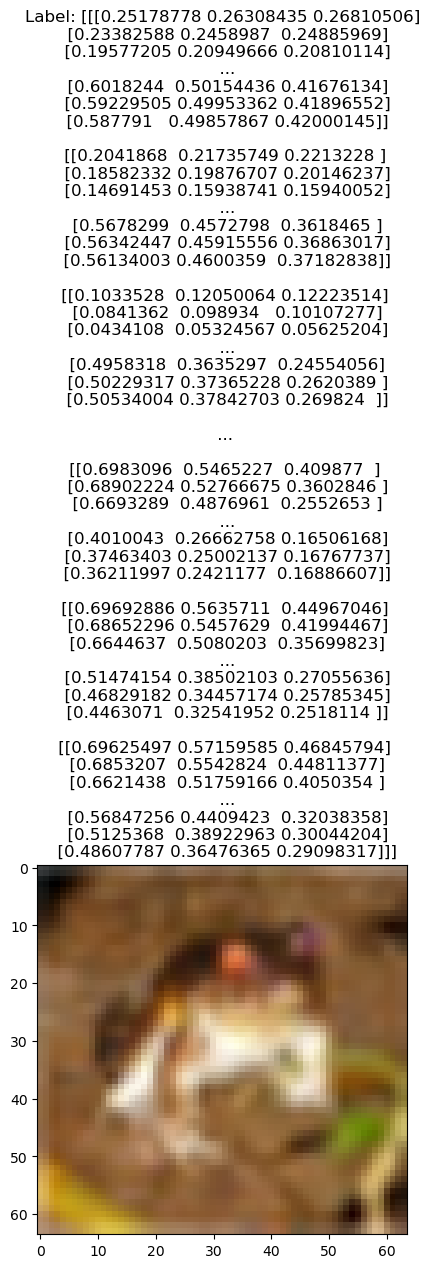

In [85]:
# Display the first image 64 x 64 
import matplotlib.pyplot as plt
plt.imshow(x_train_resized[0])
plt.title(f"Label: {y_train_resized[0]}")
plt.show()

## Model by Aurele

In [86]:
from keras.backend import clear_session
clear_session()

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model_a = Sequential([
    # Block 1
    Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Block 3
    Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),

    # Fully connected layers
    Flatten(),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")  # 10 classes
])

model_a.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 272,106 (1.04 MB)

 Trainable params: 271,658 (1.04 MB)

 Non-trainable params: 448 (1.75 KB)

In [88]:
# Your code here :

# compile model
model_a.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Train on cifar-10
batch_size = 512
epochs = 1   # 70

# Train the model and store the history
history_a = model_a.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# """
# ## Evaluate the trained model
# """

# score = model_a.evaluate(x_test, y_test, verbose=0)
# print("Test loss:", score[0])
# print("Test accuracy:", score[1])



88/88 ━━━━━━━━━━━━━━━━━━━━ 69s 766ms/step - accuracy: 0.1154 - loss: 2.6757 - val_accuracy: 0.1058 - val_loss: 7.4073


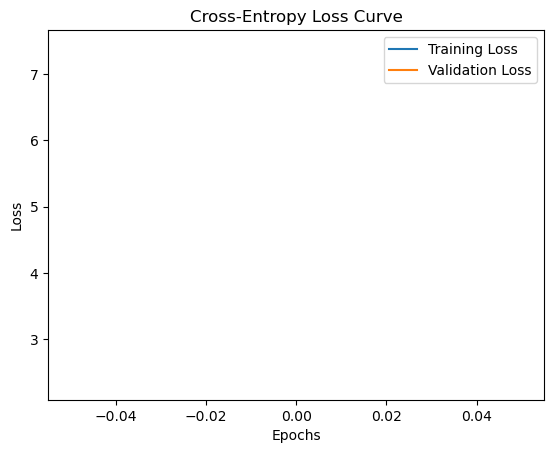

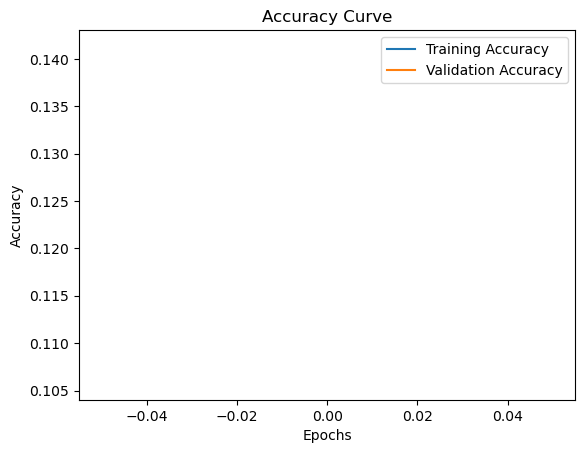

In [89]:
import matplotlib.pyplot as plt


# Plot the loss curve
plt.figure()
plt.plot(history_a.history['loss'], label='Training Loss')
plt.plot(history_a.history['val_loss'], label='Validation Loss')
plt.title('Cross-Entropy Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.figure()
plt.plot(history_a.history['accuracy'], label='Training Accuracy')
plt.plot(history_a.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


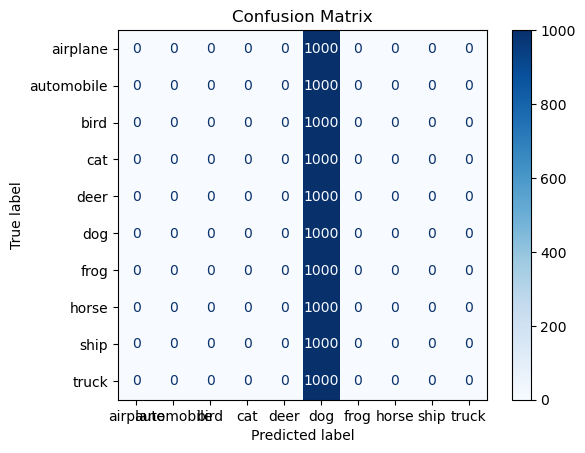

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Predict the test set
y_pred_a_prob = model_a.predict(x_test)  # Predict probabilities
y_pred_a = np.argmax(y_pred_a_prob, axis=1)  # Convert probabilities to class labels

# Assuming y_test is in multilabel-indicator format, convert it to multiclass
# Replace this line with the appropriate conversion if y_test has a different format
y_test_multiclass = np.argmax(y_test, axis=1)  # Convert to multiclass if y_test is multilabel-indicator

# Step 2: Compute confusion matrix
# Use the converted y_test_multiclass instead of y_test
cm_a = confusion_matrix(y_test_multiclass, y_pred_a)

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Step 3: Plot confusion matrix with word labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm_a, display_labels=class_names)  # Use class_names instead of numbers
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [91]:
# Evaluate the trained model

score = model_a.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 7.41797399520874
Test accuracy: 0.10000000149011612


In [92]:
# Precision, recall, F1 report

import pandas as pd
from sklearn.metrics import precision_recall_fscore_support

metrics = precision_recall_fscore_support(y_test_multiclass, y_pred_a, average=None)
report_df_a = pd.DataFrame({
    'Class': class_names,
    'Precision': metrics[0],
    'Recall': metrics[1],
    'F1-Score': metrics[2],
    'Support': metrics[3]
})
print(report_df_a)

        Class  Precision  Recall  F1-Score  Support
0    airplane        0.0     0.0  0.000000     1000
1  automobile        0.0     0.0  0.000000     1000
2        bird        0.0     0.0  0.000000     1000
3         cat        0.0     0.0  0.000000     1000
4        deer        0.0     0.0  0.000000     1000
5         dog        0.1     1.0  0.181818     1000
6        frog        0.0     0.0  0.000000     1000
7       horse        0.0     0.0  0.000000     1000
8        ship        0.0     0.0  0.000000     1000
9       truck        0.0     0.0  0.000000     1000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model by Enrique

## Model by Paul

In [93]:
from keras.backend import clear_session
clear_session()

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D


# Define input shape for the VGG-like architecture
input_shape_value3 = (64, 64, 3)  # Input as per VGG guidelines
num_classes = 10  # Number of classes for classification

model_p = keras.Sequential()

# Block 1
model_p.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape_value3))
model_p.add(BatchNormalization())
model_p.add(Dropout(0.2))  
model_p.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model_p.add(BatchNormalization())
model_p.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model_p.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_p.add(BatchNormalization())
model_p.add(Dropout(0.5)) 

# Block 3
model_p.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model_p.add(BatchNormalization())
model_p.add(MaxPooling2D(pool_size=(2, 2)))
model_p.add(Dropout(0.5)) 


model_p.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model_p.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model_p.add(Dropout(0.5))  # Higher dropout for even deeper layers


# Replace Flatten with GAP
model_p.add(GlobalAveragePooling2D())  # GAP for dimensionality reduction
model_p.add(Dense(512, activation='relu'))
model_p.add(Dropout(0.5))
model_p.add(Dense(num_classes, activation='softmax'))  # Output layer

model_p.summary()  # Print the architecture summary

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 469,866 (1.79 MB)

 Trainable params: 469,354 (1.79 MB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size_value = 512
epochs_value = 1 # 150

# Advanced Data Augmentation
datagen_p = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen_p.fit(x_train_resized)
train_generator = datagen.flow(x_train_resized, y_train, batch_size=32)

# automaticly stopping by reaching the point the plateau
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Stop when accuracy stops improving
    patience=10,              # Allow 5 epochs without improvement
    restore_best_weights=True
)

# helping adapting the learing rate for mor accurancy / Learning Rate Scheduler
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',     # Monitor validation loss
    factor=0.5,             # Reduce learning rate by half
    patience=5,             
    min_lr=1e-7             # Set a minimum learning rate
)

optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001)

# Compile and Train Model with Scheduler
model_p.compile(
    optimizer=optimizer,  # Initial LR
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Trainning the Model with Scheduler,
history_p = model_p.fit(
    train_generator,
    epochs= epochs_value, 
    batch_size=batch_size_value,
    validation_data=(x_test_resized, y_test),
    callbacks=[reduce_lr, early_stopping]
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 104/1563 ━━━━━━━━━━━━━━━━━━━━ 8:49 363ms/step - accuracy: 0.1829 - loss: 2.2199

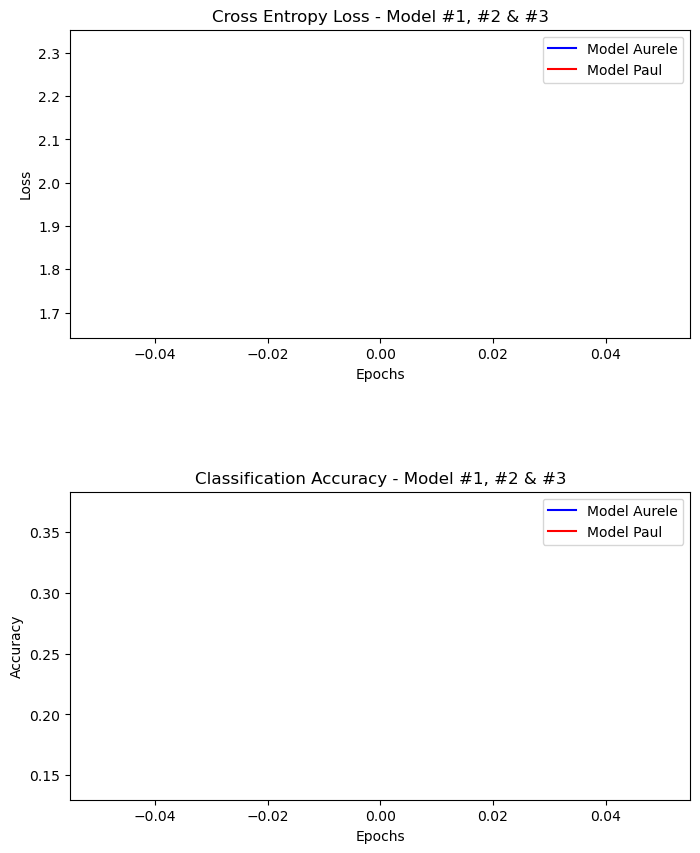

Model #1 Architecture:
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


2024-12-06 12:02:40.351745: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at reshape_op.h:65 : INVALID_ARGUMENT: Only one input size may be -1, not both 0 and 1
2024-12-06 12:02:40.352168: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INVALID_ARGUMENT: Only one input size may be -1, not both 0 and 1
	 [[{{function_node __inference_one_step_on_data_77603}}{{node sequential_1_1/flatten_1_1/Reshape}}]]


InvalidArgumentError: Graph execution error:

Detected at node sequential_1_1/flatten_1_1/Reshape defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 701, in start

  File "/opt/anaconda3/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/opt/anaconda3/lib/python3.12/asyncio/base_events.py", line 641, in run_forever

  File "/opt/anaconda3/lib/python3.12/asyncio/base_events.py", line 1987, in _run_once

  File "/opt/anaconda3/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 534, in dispatch_queue

  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 523, in process_one

  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 429, in dispatch_shell

  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 767, in execute_request

  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 429, in do_execute

  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/opt/anaconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/opt/anaconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/opt/anaconda3/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/opt/anaconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/opt/anaconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/opt/anaconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/var/folders/7n/00k0v2dx0svg_h5qbblr0y3w0000gn/T/ipykernel_97254/245308338.py", line 33, in <module>

  File "/opt/anaconda3/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 481, in evaluate

  File "/opt/anaconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 216, in function

  File "/opt/anaconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 129, in multi_step_on_iterator

  File "/opt/anaconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 110, in one_step_on_data

  File "/opt/anaconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 87, in test_step

  File "/opt/anaconda3/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/layer.py", line 899, in __call__

  File "/opt/anaconda3/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/lib/python3.12/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/opt/anaconda3/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/sequential.py", line 213, in call

  File "/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py", line 182, in call

  File "/opt/anaconda3/lib/python3.12/site-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py", line 632, in call

  File "/opt/anaconda3/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/layer.py", line 899, in __call__

  File "/opt/anaconda3/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/lib/python3.12/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/opt/anaconda3/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py", line 54, in call

  File "/opt/anaconda3/lib/python3.12/site-packages/keras/src/ops/numpy.py", line 4761, in reshape

  File "/opt/anaconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/numpy.py", line 1885, in reshape

Only one input size may be -1, not both 0 and 1
	 [[{{node sequential_1_1/flatten_1_1/Reshape}}]] [Op:__inference_multi_step_on_iterator_77668]

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 10))  # Set figure size for better clarity

# First subplot for loss
plt.subplot(211)
plt.title('Cross Entropy Loss - Model #1, #2 & #3')
plt.plot(history_a.history['loss'], color='blue', label='Model Aurele')
# plt.plot(history_e.history['loss'], color='green', label='Model Enrique')
plt.plot(history_p.history['loss'], color='red', label='Model Paul')
plt.xlabel('Epochs')  # Add x-label for consistency
plt.ylabel('Loss')    # Add y-label
plt.legend()

# Second subplot for accuracy
plt.subplot(212)
plt.title('Classification Accuracy - Model #1, #2 & #3')
plt.plot(history_a.history['accuracy'], color='blue', label='Model Aurele')
# plt.plot(history_e.history['accuracy'], color='green', label='Model Enrique')
plt.plot(history_p.history['accuracy'], color='red', label='Model Paul')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust spacing between plots to prevent overlap
plt.subplots_adjust(hspace=0.5)

plt.show()

# Print results for all models
print("\033[1mModel #1 Architecture:\033[0m")
print(history_a.history.keys())
score = model_a.evaluate(x_test_resized, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1], '\n')

# print("\033[1mModel #2 Architecture:\033[0m")
# print(history_e.history.keys())
# score2 = model_e.evaluate(x_test_resized, y_test, verbose=0)
# print("Test loss:", score2[0])
# print("Test accuracy:", score2[1], '\n')

print("\033[1mModel #3 Architecture:\033[0m")
print(history_p.history.keys())
score3 = model_p.evaluate(x_test_resized, y_test, verbose=0)
print("Test loss:", score3[0])
print("Test accuracy:", score3[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step


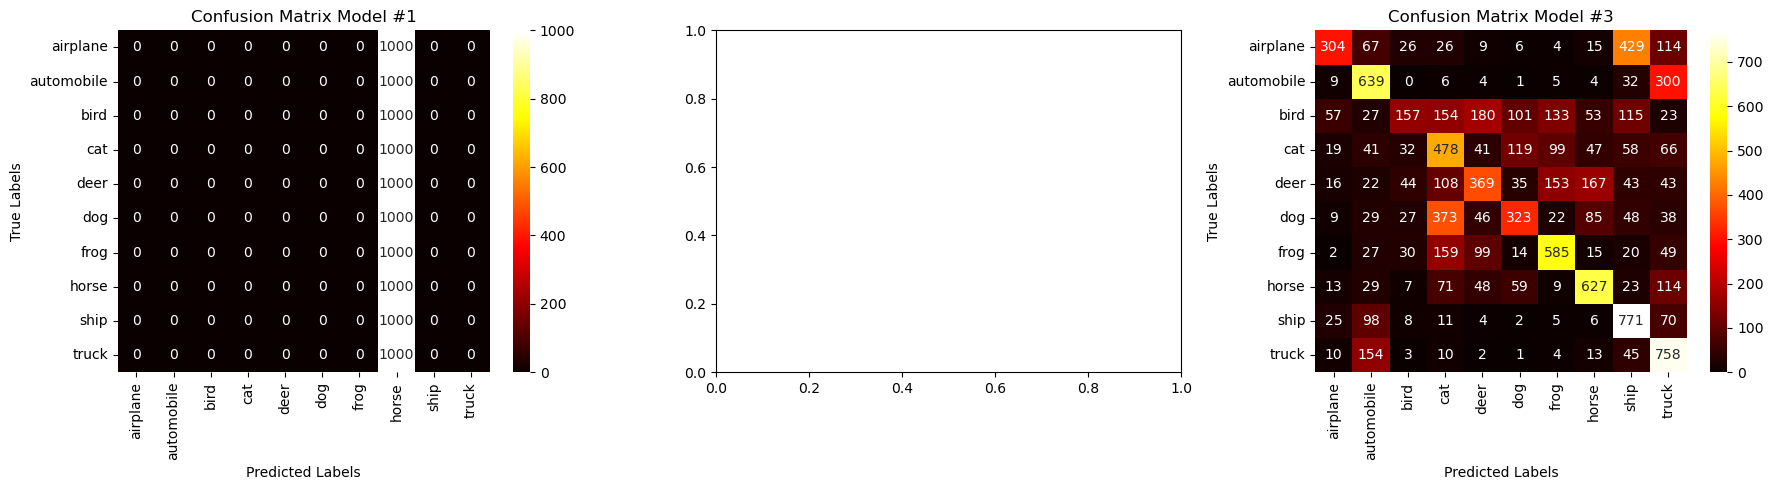

In [30]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Predictions and ground truth for model #1
predictions_a = model_a.predict(x_test)
predictions_a = np.argmax(predictions_a, axis=1)
gt_a = np.argmax(y_test, axis=1)
cm_a = confusion_matrix(gt_a, predictions_a)

# Predictions and ground truth for model #2
# predictions_e = model_e.predict(x_test)
# predictions_e = np.argmax(predictions_e, axis=1)
# gt_e = np.argmax(y_test, axis=1)
# cm_e = confusion_matrix(gt_e, predictions_e)

# Before making predictions, resize x_test to match the training size
x_test_resized = tf.image.resize(x_test, (64, 64), method=tf.image.ResizeMethod.BICUBIC) # Assuming your model was trained on 128x128 images

# Predictions and ground truth for model #3
predictions_p = model_p.predict(x_test_resized)  # Use the resized images for prediction
predictions_p = np.argmax(predictions_p, axis=1)
gt_p = np.argmax(y_test, axis=1)
cm_p = confusion_matrix(gt_p, predictions_p)

# Create subplots for all three models
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Confusion matrix for Model #1
sns.heatmap(cm_a, annot=True, fmt='d', cmap='hot', xticklabels=class_names, yticklabels=class_names, ax=axs[0])
axs[0].set_title('Confusion Matrix Model #1')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')

# Confusion matrix for Model #2
# sns.heatmap(cm_e, annot=True, fmt='d', cmap='hot', xticklabels=class_names, yticklabels=class_names, ax=axs[1])
# axs[1].set_title('Confusion Matrix Model #2')
# axs[1].set_xlabel('Predicted Labels')
# axs[1].set_ylabel('True Labels')

# Confusion matrix for Model #3
sns.heatmap(cm_p, annot=True, fmt='d', cmap='hot', xticklabels=class_names, yticklabels=class_names, ax=axs[2])
axs[2].set_title('Confusion Matrix Model #3')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')

# Adjust layout to ensure proper spacing
plt.tight_layout()
plt.show()


In [ ]:
metrics = precision_recall_fscore_support(y_test_multiclass, predictions_p, average=None)
report_df_p = pd.DataFrame({
    'Class': class_names,
    'Precision': metrics[0],
    'Recall': metrics[1],
    'F1-Score': metrics[2],
    'Support': metrics[3]
})

print(f"Aureles Model result: \n { report_df_a} \n")
# print(f"Enriques Model result: \n { report_df_e} \n")
print(f"Pauls Model result: \n { report_df_p} \n")

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Example: Programmatically calculated data for two models
# Replace y_test and predictions_a/p with your data

# Model results (Aurele's and Paul's Models)
metrics_a = precision_recall_fscore_support(y_test, predictions_a, average=None)
metrics_p = precision_recall_fscore_support(y_test, predictions_p, average=None)

# Extract metrics for Aurele's Model
aurele_precision = metrics_a[0]
aurele_recall = metrics_a[1]
aurele_f1 = metrics_a[2]

# Extract metrics for Paul's Model
paul_precision = metrics_p[0]
paul_recall = metrics_p[1]
paul_f1 = metrics_p[2]

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Aurele's Model
x = np.arange(len(classes))
axs[0].bar(x - 0.2, aurele_precision, 0.2, label='Precision', alpha=0.8)
axs[0].bar(x, aurele_recall, 0.2, label='Recall', alpha=0.8)
axs[0].bar(x + 0.2, aurele_f1, 0.2, label='F1-Score', alpha=0.8)
axs[0].set_title("Aurele's Model", fontsize=14)
axs[0].set_xlabel("Class", fontsize=12)
axs[0].set_ylabel("Score", fontsize=12)
axs[0].set_xticks(x)
axs[0].set_xticklabels(classes, rotation=45)
axs[0].legend()

# Enriques's Model
# axs[1].bar(x - 0.2, enrique_precision, 0.2, label='Precision', alpha=0.8)
# axs[1].bar(x, enrique_recall, 0.2, label='Recall', alpha=0.8)
# axs[1].bar(x + 0.2, enrique_f1, 0.2, label='F1-Score', alpha=0.8)
# axs[1].set_title("Enriques's Model", fontsize=14)
# axs[1].set_xlabel("Class", fontsize=12)
# axs[1].set_xticks(x)
# axs[1].set_xticklabels(classes, rotation=45)
# axs[1].legend()

# Paul's Model
axs[1].bar(x - 0.2, paul_precision, 0.2, label='Precision', alpha=0.8)
axs[1].bar(x, paul_recall, 0.2, label='Recall', alpha=0.8)
axs[1].bar(x + 0.2, paul_f1, 0.2, label='F1-Score', alpha=0.8)
axs[1].set_title("Paul's Model", fontsize=14)
axs[1].set_xlabel("Class", fontsize=12)
axs[1].set_xticks(x)
axs[1].set_xticklabels(classes, rotation=45)
axs[1].legend()

plt.tight_layout()
plt.show()
